In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

df = pd.read_csv('data/train.csv')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015A63AEF978>,
      dtype=object)

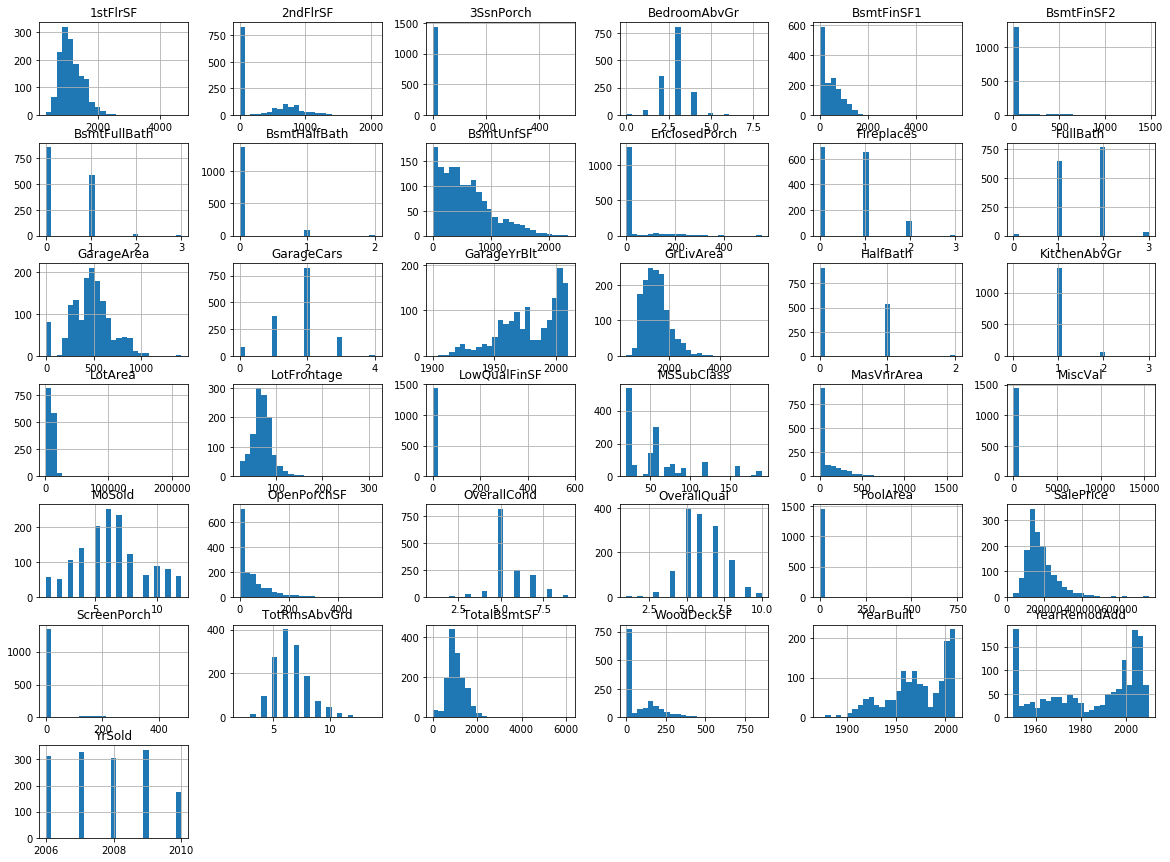

In [2]:
dfcom = df.drop('Id', axis = 1)
dfcom.hist(figsize = (20,15), bins = 25)

In [3]:
for i in dfcom.columns:
    print(i,' : ', dfcom[i].dtype)

MSSubClass  :  int64
MSZoning  :  object
LotFrontage  :  float64
LotArea  :  int64
Street  :  object
Alley  :  object
LotShape  :  object
LandContour  :  object
Utilities  :  object
LotConfig  :  object
LandSlope  :  object
Neighborhood  :  object
Condition1  :  object
Condition2  :  object
BldgType  :  object
HouseStyle  :  object
OverallQual  :  int64
OverallCond  :  int64
YearBuilt  :  int64
YearRemodAdd  :  int64
RoofStyle  :  object
RoofMatl  :  object
Exterior1st  :  object
Exterior2nd  :  object
MasVnrType  :  object
MasVnrArea  :  float64
ExterQual  :  object
ExterCond  :  object
Foundation  :  object
BsmtQual  :  object
BsmtCond  :  object
BsmtExposure  :  object
BsmtFinType1  :  object
BsmtFinSF1  :  int64
BsmtFinType2  :  object
BsmtFinSF2  :  int64
BsmtUnfSF  :  int64
TotalBsmtSF  :  int64
Heating  :  object
HeatingQC  :  object
CentralAir  :  object
Electrical  :  object
1stFlrSF  :  int64
2ndFlrSF  :  int64
LowQualFinSF  :  int64
GrLivArea  :  int64
BsmtFullBath  :  int64

In [4]:
dfp = dfcom.iloc[:,20:40]
Y = dfcom['SalePrice']

In [5]:
dfp.shape

(1460, 20)

In [6]:
for i in dfp.columns:
    print(i,' : ', dfcom[i].dtype)

RoofStyle  :  object
RoofMatl  :  object
Exterior1st  :  object
Exterior2nd  :  object
MasVnrType  :  object
MasVnrArea  :  float64
ExterQual  :  object
ExterCond  :  object
Foundation  :  object
BsmtQual  :  object
BsmtCond  :  object
BsmtExposure  :  object
BsmtFinType1  :  object
BsmtFinSF1  :  int64
BsmtFinType2  :  object
BsmtFinSF2  :  int64
BsmtUnfSF  :  int64
TotalBsmtSF  :  int64
Heating  :  object
HeatingQC  :  object


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015A65C66C50>,
      dtype=object)

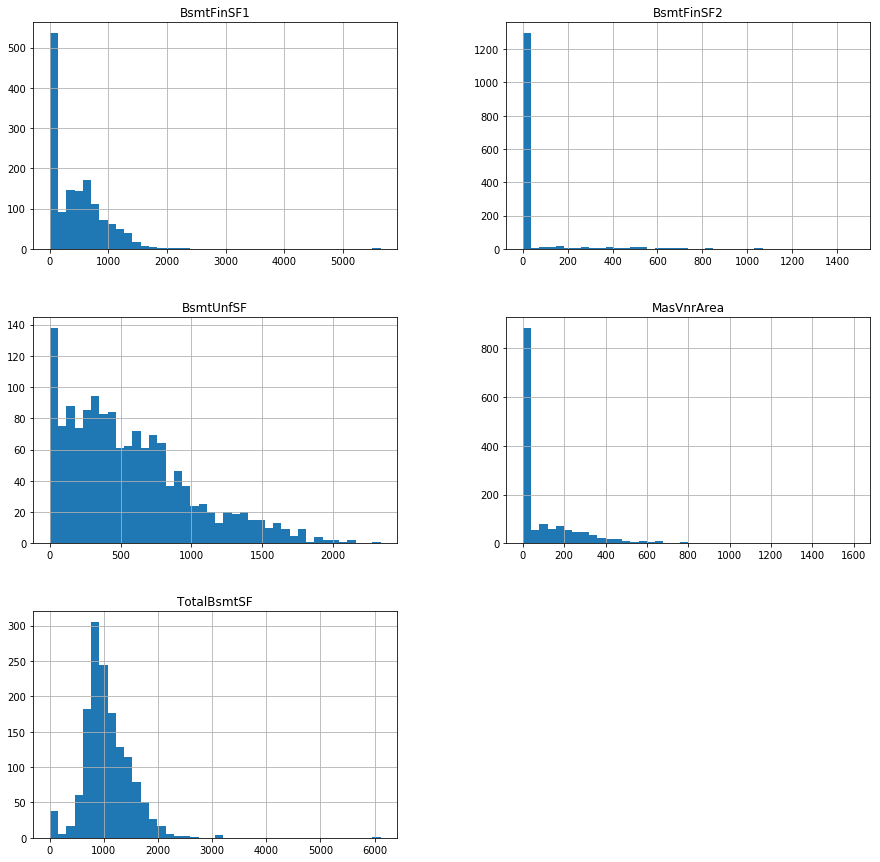

In [7]:
cont = []
for i in dfp.columns:
    if (dfp[i].dtype == 'float64') | (dfp[i].dtype == 'int64'):
        cont.append(i)

dfp[cont] = dfp[cont].astype('float64')
nums = dfp[cont]
nums.hist(figsize = (15,15), bins = 40)

In [8]:
nums = nums.fillna(0)
nums.isna().sum()

MasVnrArea     0
BsmtFinSF1     0
BsmtFinSF2     0
BsmtUnfSF      0
TotalBsmtSF    0
dtype: int64

In [9]:
cats =  dfp.drop(cont, axis = 1)
miss = list(cats.columns[cats.isnull().sum()>0])
cat_cols = list(cats.columns)

In [10]:
#cols w/ na
cats[miss].isnull().sum()

MasVnrType       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
dtype: int64

In [13]:
#cat_cols will be dropped later
x = pd.get_dummies(dfp[cat_cols], dummy_na = True)
dfpd = pd.concat([dfp, x], axis=1)
dfpd.to_pickle('C:/Users/phili/NYCDSA/Machine_Learning/Project1/kaggle-housing-prices/philpick.pkl')

In [20]:
# from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

# lasso  = Lasso()
# alphas = np.linspace(0.1,20.1,20)
# lasso.set_params(normalize=False)
# coefs_lasso  = []

# for alpha in alphas:
#         lasso.set_params(alpha=alpha)
#         lasso.fit(dfpd, Y)  
#         coefs_lasso.append(lasso.coef_)

# coefs_lasso = pd.DataFrame(coefs_lasso, index = alphas, columns = dfpd.columns)  
# coefs_lasso.head()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').